# Harmonic Oscillator

The harmonic oscillator is certainly one of the working horses of physics. In quantum mechanics, it resembles to be a good model for the motion of two bound atoms, i.e. bond vibrations, which are of relevance for al types of molecules and solids.

In [3]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

As compared to the particle in a box, we have to change the potential in the Hamilton operator to solve the harmonic oscillator. The potential energy of the harmonic oscillator is given as

\begin{equation}
V(x)=\frac{k}{2}x^2
\end{equation}


where $k$ is the spring constant and $x$ is the deviation from its minimum potential energy position. For an atomic bond between carbon and oxygen, for example, the spring constant corresponds to $k=396$ N/m.


![Harmonic Potential](harmonic_potential.png)




The C=O bond has a bond length of $x_{0}=1.229$, so we do not have to look at a large domain. A region of $L=1 \mathring{A}$ provides already an energy change by 3 eV. 

## Definition of the problem

Before we start, we need to define some quantities:

* we will study a domain of L=1 Angström
* we will use N=1001 points for our $x_{i}$
* the spring constant shall be $k=396$ N/m
* we will use the mass of the carbon atom

In [38]:
# define some useful constants
hbar=1.678e-35 # joule seconds
m_c=1.998467052e-26 # carbon atom mass in kg
m_o=2.657e-26 # oxygen mass in kg
m=m_c*m_o/(m_c+m_o)
N=1001
k=396  # spring constant of the C=O bond N/m

L= 0.5e-10 #m

x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

### Potential energy

We first define the diagonal potential energy matrix.

In [13]:
# potential energy for the harmonic oscillator
U_vec = 0.5*k*x**2

# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

### Kinetic energy

Next are the derivatives of the kinetic energy matrix.

In [15]:
# T is the finite difference2 representation of the second derivative in the kinetic energy
T = -hbar**2*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2/2/m

An finally the total Hamilton operator matrix again.

In [16]:
# Sum of kinetic and potential energy
H = T + U

### Solution

The last step is to solve the system of coupled equations using the `eigsh` method of the `scipy`
module again.

In [21]:
# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=10
vals, vecs = eigsh(H, k=n , which='SM')

### Plotting

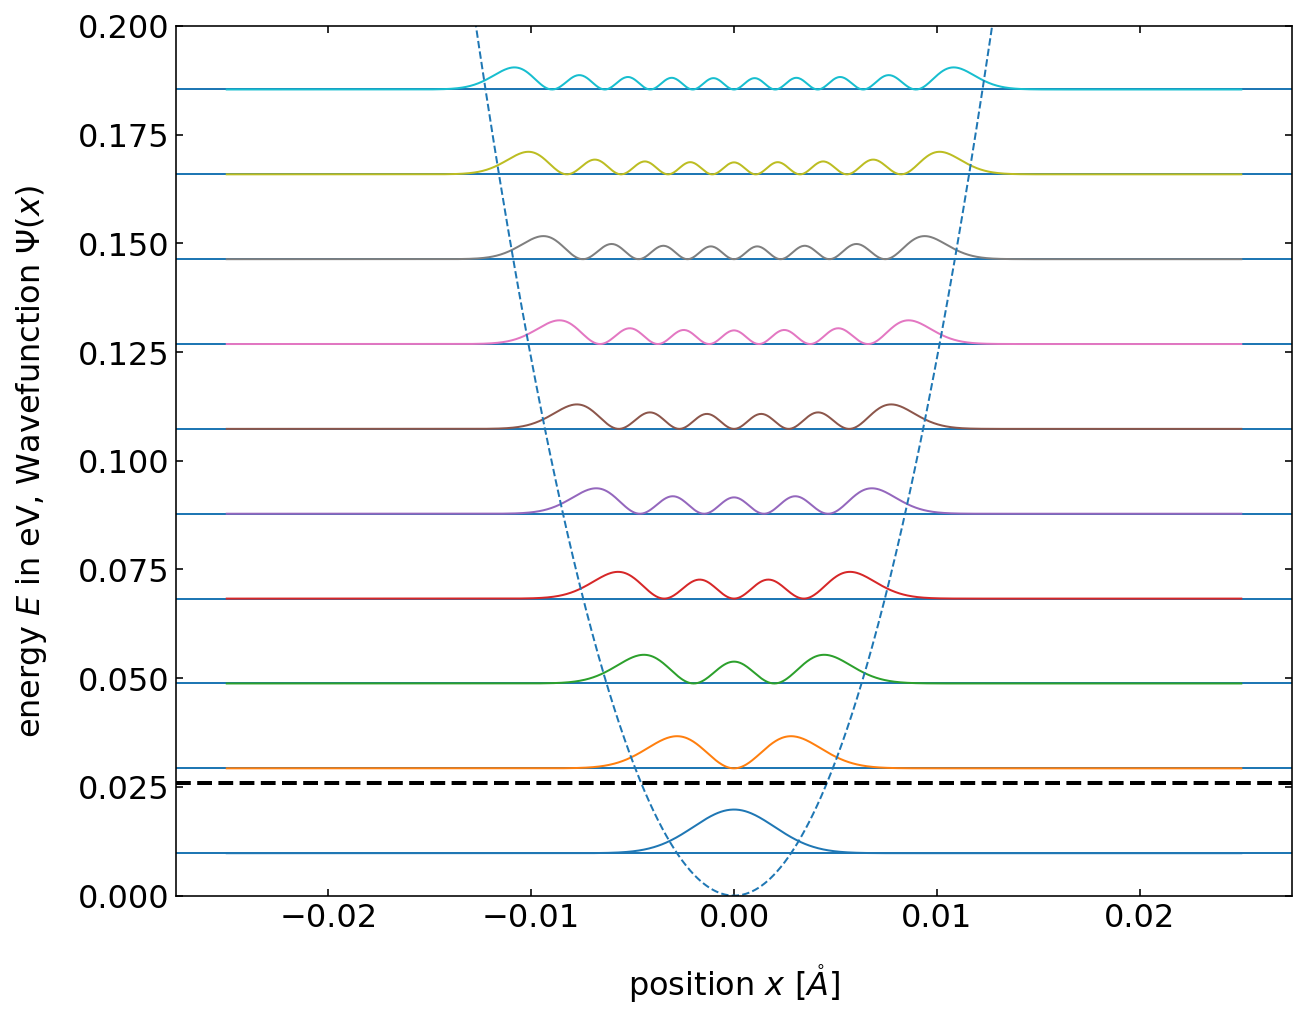

In [35]:
# define some scaling to make a nice plot
scale=1e9 # position scale
escale=6.242e18 # energy scale in eV
psiscale=1 # wavefunction scale 

plt.figure(figsize=(10,8))

for i in range(n):
    vec = vecs[:, i]
    mag = np.sqrt(np.dot(vecs[:, i],vecs[:, i]))
    vec = vec/mag
    plt.axhline(y=vals[i]*escale)
    plt.plot(x*scale, psiscale*np.abs(vec)**2+vals[i]*escale)

plt.plot(x*scale,U_vec*escale,'--')
plt.xlabel(r"position $x$ [$\mathring{A}$]")
plt.ylabel(r"energy $E$ in eV, Wavefunction $\Psi(x)$")
plt.axhline(y=0.026,color='k',ls='--',lw=2)
plt.ylim(0,0.2)
plt.show()

### Energies of the states

The diagram above, shows that the energy values in the harmonic oscillator model are equally spaced. The horizontal dashed line corresponds to the thermal energy at 300 K temperature ($E_{th}=0.026$ eV). The bond length changes $x$ are pretty small as compared to the actual bond length.

The analytical solution of the harmonic oscillator shows energy states at

\begin{equation}
E_{n}=\left (n+\frac{1}{2} \right )\hbar \omega
\end{equation}

where $n$ is the quantum number running from $0,\ldots,$ and $\omega$ is the frequency of the bond vibration, i.e. $\omega=\sqrt{k/m}$. The graph below compares the 

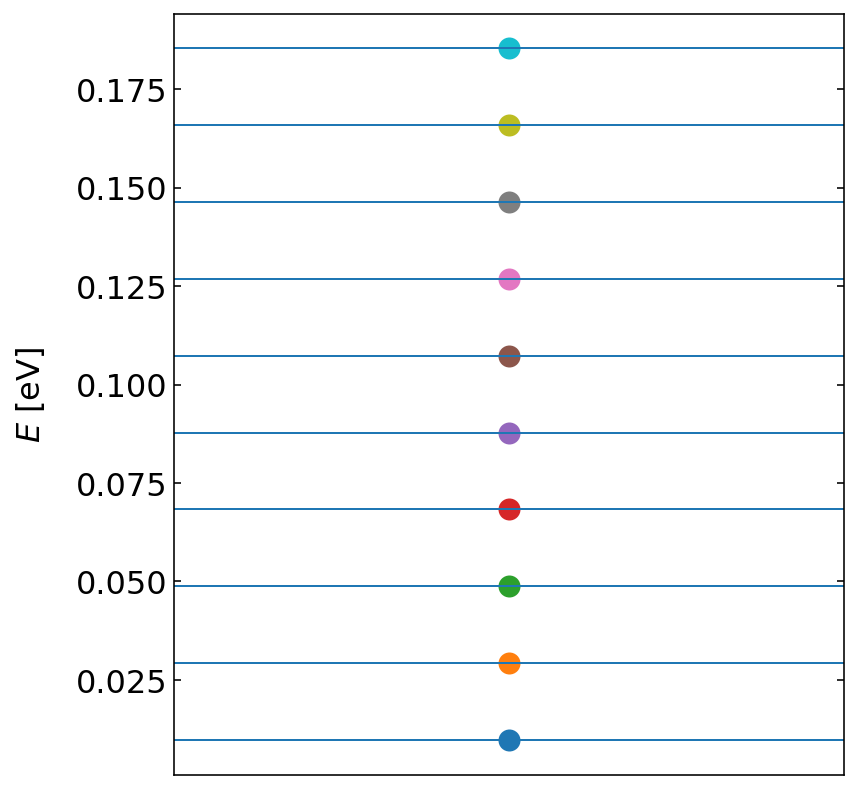

In [42]:
fig = plt.figure(figsize=(6,7))
plt.ylabel(r"$E$ [eV]")
for i in range(n):
    plt.axhline(y=vals[i]*escale)
    plt.scatter([0],(i+0.5)*hbar*np.sqrt(k/m)*escale)

plt.xticks([])
plt.show()

## Where to go from here?

Bond potentials between atoms are typically not parabolic. They are anharmonic. You see that for example in the thermal expansion of materials. A more appropriate description of such bond potentials is the Morse potential

\begin{equation}
V(x)=V_{0}\left (1-e^{-\alpha(x-x_0)}\right)^2
\end{equation}

The shape of this potential is shown below with a value of $x_{0}=3$, $\alpha=1$ and $V_{0}=10$. When the energy in the bond is larger than the value $V_{0}$, the molecule will dissociate.

![Morse Potential](morse_potential.png)

If you are interested, try to find paramaters for ea real world example and the Morse potential and simulate the wavefunction and energy values and observe, for example, if the energy values are still equidistant or not.